In [1]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, iris.target, test_size=0.2, random_state=42
)


In [9]:
accuracy_scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K = {k}, Accuracy = {acc:.2f}")


K = 1, Accuracy = 0.97
K = 2, Accuracy = 1.00
K = 3, Accuracy = 1.00
K = 4, Accuracy = 1.00
K = 5, Accuracy = 1.00
K = 6, Accuracy = 1.00
K = 7, Accuracy = 1.00
K = 8, Accuracy = 1.00
K = 9, Accuracy = 1.00
K = 10, Accuracy = 1.00


Accuracy: 1.0


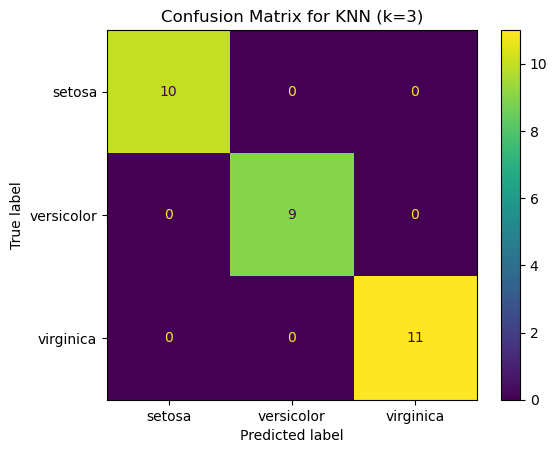

In [11]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix for KNN (k=3)")
plt.show()


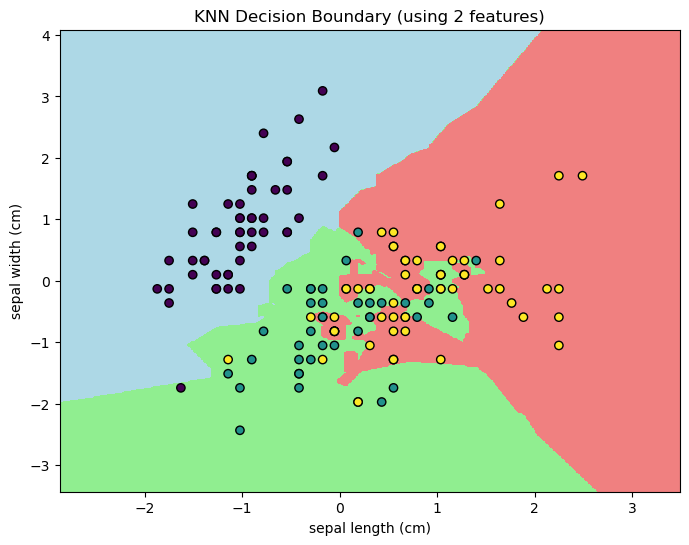

In [13]:
from matplotlib.colors import ListedColormap
import numpy as np

# Use only first two features for 2D plot
X_vis = X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vis, iris.target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train2)

h = .02  # step size
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightgreen', 'lightcoral')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=iris.target, edgecolor='k')
plt.title("KNN Decision Boundary (using 2 features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
